#  탐색 알고리즘

------------------------------

**(코랩에서)한글 폰트 지정하는 방법**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>세션 다시 시작" 합니다.

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')       # (코랩)한글 폰트



---



# 1.탐색 알고리즘_1

## 1-1. 탐색 알고리즘 개요

### 1) 탐색 알고리즘 아키텍처 (시뮬레이션)

- **기초 알고리즘 시뮬레이션 예**:
    - 1.입력 데이터(Input) : 리스트, 배열, 트리 등
    - 2.탐색 조건(Target) : 특정 값 또는 키
    - 3.탐색 알고리즘(Search) : 선형 탐색, 이진 탐색, 해시 탐색, 트리 탐색
    - 4.탐색 결과(Output) : 인덱스, 노드, 없음을 의미

In [2]:
# 1. 입력 데이터 (리스트)
input_data = [3, 7, 1, 9, 5, 8, 4, 2, 6]
target = 5  # 탐색 조건 (특정 값)

# 2. 선형 탐색 (Linear Search)
def linear_search(data, target):
    for i, val in enumerate(data):
        if val == target:
            return i
    return -1

# 3. 이진 탐색 (Binary Search) - 정렬 필요
def binary_search(data, target):
    sorted_data = sorted(data)
    left, right = 0, len(sorted_data) - 1
    while left <= right:
        mid = (left + right) // 2
        if sorted_data[mid] == target:
            return mid  # 주의: 정렬된 인덱스
        elif sorted_data[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# 4. 해시 탐색 (Hashing) - dict 활용
def hash_search(data, target):
    hash_map = {val: i for i, val in enumerate(data)}
    return hash_map.get(target, -1)

# 5. 트리 탐색 (DFS) - 이진 탐색 트리 구성 후 DFS
class Node:
    def __init__(self, key):
        self.key = key
        self.left = self.right = None

def insert_bst(root, key):
    if root is None:
        return Node(key)
    if key < root.key:
        root.left = insert_bst(root.left, key)
    else:
        root.right = insert_bst(root.right, key)
    return root

def dfs_search(node, target):
    if node is None:
        return False
    if node.key == target:
        return True
    return dfs_search(node.left, target) or dfs_search(node.right, target)

# 트리 생성
bst_root = None
for val in input_data:
    bst_root = insert_bst(bst_root, val)

# 6. 결과 출력
print("입력 데이터:", input_data)
print("탐색 조건:", target)

print("\n탐색 결과:")
print(" - 선형 탐색 결과:", linear_search(input_data, target))
print(" - 이진 탐색 결과:", binary_search(input_data, target))
print(" - 해시 탐색 결과:", hash_search(input_data, target))
print(" - 트리 DFS 탐색 결과:", "찾음" if dfs_search(bst_root, target) else "없음")


입력 데이터: [3, 7, 1, 9, 5, 8, 4, 2, 6]
탐색 조건: 5

탐색 결과:
 - 선형 탐색 결과: 4
 - 이진 탐색 결과: 4
 - 해시 탐색 결과: 4
 - 트리 DFS 탐색 결과: 찾음


- **구글 검색 알고리즘 시뮬레이션 예**:
    - 1.쿼리 분석 – 정규화, 토크나이징
    - 2.색인 생성 (Inverted Index) – 문서의 단어 빈도 분석
    - 3.검색 알고리즘 수행 – TF-IDF, BM25 등으로 점수 계산
    - 4.결과 정렬 및 필터링
    - 5.사용자에게 결과 반환

In [ ]:
!pip install rank-bm25 scikit-learn pandas nltk konlpy matplotlib

In [6]:
!pip install rank_bm25
!pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   -- ------------------------------------- 1.0/19.4 MB 6.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.6/19.4 MB 4.6 MB/s eta 0:00:04
   ---- ----------------------------------- 2.4/19.4 MB 3.6 MB/s eta 0:00:05
   ------ --------------------------------- 3.1/19.4 MB 3.6 MB/s eta 0:00:05
   -------- ------------------------------- 4.2/19.4 MB 3.9 MB/s eta 0:00:04
   --------- ------------------------------ 4.7/19.4 MB 3.8 MB/s eta 0:00:04
   ---------- ----------------------------- 5.2/19.4 MB 3.6 MB/s eta 0:00:04
   ----------- ---------------------------- 5.8/19.4 MB 3.5 MB/s eta 0:00:04
   ------------- -------------------------- 6.6/19.4 MB 3.4 MB/s eta 0:00:04
   -------------- ------------------------- 7.1/19.4 MB 3.3 MB/s eta 0:00:04
   --------------- ------------------------ 7.3/19.4 MB 3.1 MB/s eta 0:00:04
   --------------- ------------------------ 7.6/19.4 MB 3.0 MB/s eta 0:00:04
   ---

In [7]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from rank_bm25 import BM25Okapi
from konlpy.tag import Okt
import networkx as nx

# 1. 형태소 분석기 준비
okt = Okt()

# 2. 예제 문서 (간단한 뉴스 데이터처럼 구성)
documents = [
    "고양이는 매우 귀엽고 사람들과 잘 어울립니다.",
    "인공지능은 다양한 산업에서 활용되고 있습니다.",
    "딥러닝 기술은 이미지와 음성 인식에서 큰 성과를 보이고 있습니다.",
    "강아지는 충성스럽고 사람을 잘 따릅니다.",
    "자율주행 자동차는 인공지능을 기반으로 동작합니다."
]

doc_ids = list(range(len(documents)))

# 3. 쿼리 입력 및 형태소 분석 기반 토크나이징
query = "AI 자율주행 기술"
tokenized_query = okt.morphs(query)

# 4. TF-IDF 기반 검색
# TF-IDF는 띄어쓰기 단위로만 처리하므로 별도 토크나이징 불필요
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
query_vector = vectorizer.transform([query])
cosine_sim = (tfidf_matrix * query_vector.T).toarray().flatten()

# 5. BM25 기반 검색 (Okt로 토크나이징된 버전 사용) - 토큰으로 잘개 쪼갬
tokenized_corpus = [okt.morphs(doc) for doc in documents]
bm25 = BM25Okapi(tokenized_corpus)
bm25_scores = bm25.get_scores(tokenized_query)

# 5. PageRank 계산을 위한 문서 링크 그래프 구성 (예시: 수동 설정)
# 현실에서는 하이퍼링크, 인용, 관련도 등을 기반으로 구성
edges = [(0, 1), (1, 2), (2, 4), (3, 0), (4, 1)]  # doc 간 연결
G = nx.DiGraph()
G.add_edges_from(edges)
pagerank_scores = nx.pagerank(G)

# 6. 점수 통합 및 결과 출력
results = []
for i, (tfidf_score, bm25_score) in enumerate(zip(cosine_sim, bm25_scores)):
    page_score = pagerank_scores.get(i, 0)
    combined_score = bm25_score * page_score  # PageRank를 가중치로 곱함
    results.append({
        "문서 ID": i,
        "문서 내용": documents[i],
        "TF-IDF 점수": round(tfidf_score, 4),
        "BM25 점수": round(bm25_score, 4),
        "PageRank 점수": round(page_score, 4),
        "최종 점수": round(combined_score, 4)
    })

df = pd.DataFrame(results)
df_sorted = df.sort_values(by="최종 점수", ascending=False).reset_index(drop=True)

from IPython.display import display
display(df_sorted)



,문서 ID,문서 내용,TF-IDF 점수,BM25 점수,PageRank 점수,최종 점수
0,4,자율주행 자동차는 인공지능을 기반으로 동작합니다.,0.4472,2.1464,0.2883,0.6189
1,2,딥러닝 기술은 이미지와 음성 인식에서 큰 성과를 보이고 있습니다.,0.0000,0.9298,0.3039,0.2826
2,0,고양이는 매우 귀엽고 사람들과 잘 어울립니다.,0.0000,0.0000,0.0555,0.0000
3,1,인공지능은 다양한 산업에서 활용되고 있습니다.,0.0000,0.0000,0.3223,0.0000
4,3,강아지는 충성스럽고 사람을 잘 따릅니다.,0.0000,0.0000,0.0300,0.0000


In [ ]:
!pip install matplotlib

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\MinGi\AppData\Local\Temp\ipykernel_27584\245154514.py:39: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MinGi\AppData\Local\Temp\ipykernel_27584\245154514.py:39: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MinGi\AppData\Local\Temp\ipykernel_27584\245154514.py:39: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MinGi\AppData\Local\Temp\ipykernel_27584\245154514.py:39: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MinGi\AppData\Local\Temp\ipykernel_27584\245154514.py:39: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MinGi\AppData\Local\Temp\ipyk

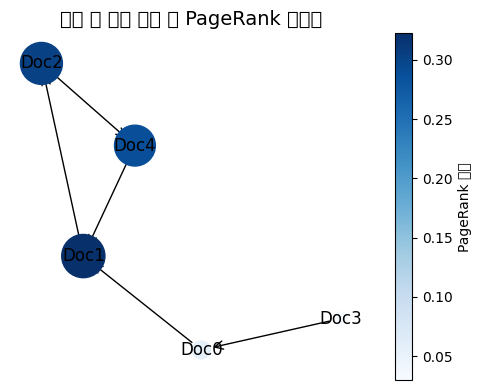

In [8]:
'''
PageRank 시각화
'''
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# 7. PageRank 시각화
fig, ax = plt.subplots(figsize=(5, 4))

# 노드 위치 자동 설정
pos = nx.spring_layout(G, seed=42)

# 노드 크기 및 색상 설정
node_sizes = [pagerank_scores[node] * 3000 for node in G.nodes()]
node_colors = [pagerank_scores[node] for node in G.nodes()]

# 정규화 객체
norm = colors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
sm = cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array(node_colors)

# 그래프 그리기 (명시적으로 ax 지정)
nx.draw_networkx_nodes(G, pos, ax=ax,
                       node_size=node_sizes,
                       node_color=node_colors,
                       cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, ax=ax, arrowstyle='->', arrowsize=15)
nx.draw_networkx_labels(G, pos, ax=ax,
                        labels={i: f'Doc{i}' for i in G.nodes()},
                        font_size=12)

# 컬러바 추가 (ax 지정)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("PageRank 점수")

ax.set_title("문서 간 연결 구조 및 PageRank 시각화", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()



- **AI 검색 알고리즘 시뮬레이션 예** :

In [9]:
!pip install sentence-transformers faiss-cpu numpy pandas

   ---------------------------------------- 0.0/13.7 MB ? eta -:--:--
   ------ --------------------------------- 2.1/13.7 MB 9.8 MB/s eta 0:00:02
   ------------ --------------------------- 4.2/13.7 MB 9.7 MB/s eta 0:00:01
   ---------------- ----------------------- 5.8/13.7 MB 9.3 MB/s eta 0:00:01
   --------------------- ------------------ 7.3/13.7 MB 8.9 MB/s eta 0:00:01
   --------------------------- ------------ 9.4/13.7 MB 9.0 MB/s eta 0:00:01
   -------------------------------- ------- 11.3/13.7 MB 9.0 MB/s eta 0:00:01
   ------------------------------------ --- 12.6/13.7 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 13.7/13.7 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/10.4 MB 7.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/10.4 MB 7.6 MB/s eta 0:00:01
   ---------------- ----------------------- 4.2/10.4 MB 7.4 MB/s eta 0:00:01
   -------

In [ ]:
from sentence_transformers import SentenceTransformer, util
import faiss
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# 1. 예제 문서 준비 (DB 역할)
documents = [
    "고양이는 귀여운 동물입니다.",
    "강아지는 사람과 친근합니다.",
    "자율 주행 자동차는 AI를 사용합니다.",
    "딥러닝은 신경망을 이용한 기계 학습 기술입니다.",
    "자연어처리는 인간 언어를 이해하는 AI 기술입니다."
]
doc_ids = list(range(len(documents)))


# 2. 모델 로딩 및 임베딩 생성 (Dense Vector) : Hugging Face 모
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
document_embeddings = model.encode(documents, convert_to_numpy=True)


# 3. FAISS 인덱스 생성 (Dense Indexing)
dimension = document_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(document_embeddings)  # 문서 벡터 저장


# 4. 사용자 쿼리 입력 및 임베딩 생성
query = "AI를 활용한 언어 분석 기술"
query_embedding = model.encode([query], convert_to_numpy=True)


# 5. 유사한 문서 검색 (Top-k Retrieval)
k = 3
D, I = index.search(query_embedding, k)  # 거리(D), 인덱스(I)

# 6. 결과 출력 (간단한 Ranking 포함)
results = []
for rank, (doc_idx, distance) in enumerate(zip(I[0], D[0]), 1):
    results.append({
        "순위": rank,
        "문서": documents[doc_idx],
        "거리(L2 norm)": round(float(distance), 4)
    })

# Pandas로 보기 좋게 출력
df = pd.DataFrame(results)
display(df)



---



### 2) 주요 탐색 알고리즘 예 :


|분류 기준|알고리즘 유형|사용 자료구조|정렬 필요 여부|시간 복잡도 (평균/최악)|공간 복잡도|특징 및 용도|
|--|--|--|--|--|--|--|
|선형 탐색 여부|선형 탐색 (Linear Search)|리스트, 배열|❌ 불필요|O(n) / O(n)|O(1)|"단순 반복으로 탐색, 데이터가 적을 때 유리"|
|선형 탐색 여부|이진 탐색 (Binary Search)|정렬된 배열|✅ 필요|O(log n) / O(log n)|O(1)|정렬된 데이터에서 빠르게 탐색 가능|
|해시 기반 탐색|해시 탐색 (Hash Search)|해시 테이블 (dict)|❌ 불필요|O(1) / O(n)|O(n)|"키 기반 탐색, 충돌 시 성능 저하 가능"|
|트리 기반 탐색|이진 탐색 트리 (BST)|트리 구조|❌ 불필요|O(log n) / O(n)|O(n)|"정렬+탐색을 모두 지원, 불균형 트리의 경우 성능 저하"|
|트리 기반 탐색|AVL / Red-Black Tree|균형 이진 탐색 트리|❌ 불필요|O(log n) / O(log n)|O(n)|균형 유지로 최악의 경우에도 빠른 탐색 가능|
|그래프 기반 탐색|DFS (깊이 우선 탐색)|스택, 그래프|❌ 불필요|O(V + E)|O(V)|"미로, 백트래킹, 순열 문제 등에 유용"|
|그래프 기반 탐색|BFS (너비 우선 탐색)|큐, 그래프|❌ 불필요|O(V + E)|O(V)|"최단 거리 탐색, 그래프 레벨 탐색에서 유용"|
|문자열 탐색|KMP, Rabin-Karp 등|문자열|❌ 불필요|O(n + m) 등|O(m) 이상|"문자열 패턴 매칭, 정보 검색 시스템에 활용"|
|현대적 검색 알고리즘|BM25, BERT reranker 등|역색인, 신경망 등|❌ 불필요|"수치 기반, 근사 검색"|모델 의존|"구글, 챗봇 등에서 자연어 기반 검색에 사용"|



-----

### @테스트 데이터 정의

In [ ]:
import numpy as np

# 1.숫자 데이터: 균등 정렬
arr = list(range(0, 1001, 10))  # 0, 10, ..., 1000
target = 420

# 2.NumPy 배열 데이터: 균등 정렬
arr_np = np.arange(-100, 100, 10)  # array([-100, -90, ..., 90])
target_np = -60

# 3.영어 단어 데이터: 사전순 정렬
english_words = sorted([
    "apple", "banana", "cherry", "date", "fig", "grape",
    "kiwi", "lemon", "mango", "orange", "peach", "plum", "quince"
])
target_english = "lemon"

# 4.한글 단어 데이터: 초성순 정렬
korean_words = sorted([
    "가방", "나무", "다리", "라디오", "마을", "바다", "사과",
    "아침", "자전거", "차례", "카메라", "타자기", "파도", "하늘"
])
target_korean = "자전거"



---



## 1-2. 선형 탐색(Linear Search)



- 배열의 처음부터 끝까지 순차적으로 모든 요소를 확인 --> 순차 탐색(Sequential search)
- 정렬되지 않은 데이터에서도 사용 가능
- 가장 단순한 탐색 방법  
- 시간 복잡도 : 𝑂(𝑛)   
    - 최선의 경우: O(1) - 첫 번째 요소가 찾는 값일 때
    - 평균/최악의 경우: O(n) - n은 배열의 크기

### 1) 선형 탐색 알고리즘

In [ ]:
def linear_search(A, target):


    return -1           # 찾지 못한 경우 -1 반환


# arr = [ 3, 9, 15, 22, 31, 55, 67, 88, 91 ]
# target = 22   # 찾는 값
# msg = f'''입력 배열 = {arr}\n찾는 숫자 = {target}\n'''
# print(f"{msg}#linear_search(idx): {linear_search(arr, target)}" )

- 공통 데이터 테스트

In [ ]:
import numpy as np

def test_search(search_func, data, target, label="데이터", sort_show=False):
    '''
    search_func : 탐색 함수명,
    data        : 탐색 데이터,
    target      : 찾는 값,
    label       : 데이터 설명
    '''
    # 원본 데이터 복사
    test_data = np.copy(data) if isinstance(data, np.ndarray) else list(data)
    test_target = target

    # 탐색 수행
    result = search_func(test_data, test_target)

    # 기대 결과 계산
    if isinstance(data, np.ndarray):
        expected = np.where(test_data == test_target)[0] if test_target in test_data else -1
    else:
        expected = test_data.index(test_target) if test_target in test_data else -1

    # 비교 결과 출력
    passed = True if expected == result else False
    print(f"[{search_func.__name__}] {label}에서 '{target}' 탐색: idx={expected} {'✅ PASS' if passed else '❌ FAIL'}")
    if not passed:
        print("Expected:", expected)
        print("Got     :", result)

    if sort_show:
        print(f" data= {data}")
        print(f" target= {target}")


test_search(linear_search, arr, target, "숫자 데이터", True)
test_search(linear_search, arr_np, target_np, "Numpy 음수 데이터", True)
test_search(linear_search, english_words, target_english, "영어 단어 데이터", True)
test_search(linear_search, korean_words, target_korean, "한글 단어 데이터", True)

### 2) 선형 탐색 개선 방법

- 빈도 기반 최적화 (Move-To-Front / Self-Organizing List)
    - **자주 탐색되는 항목을 배열 앞부분으로 옮겨** 성능을 높이는 방식
    - 장점: 반복적으로 탐색이 일어나는 경우 탐색 시간 감소

In [20]:
def move_to_front_search(A, target):
    for i in range(len(A)):
        if A[i] == target:
                           # 맨 앞으로 이동
            return 0
    return -1

arr = list(range(0, 1001, 10))  # 0, 10, ..., 1000
target = 420
print(f"#linear_search(idx)[Move-To-Front]: {move_to_front_search(arr, target)}\n{arr}" )


#linear_search(idx)[Move-To-Front]: 0
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000]


In [21]:
# list와 ndarray 가 모두 적용될 수 있도록 코드 수
def move_to_front_search(A, target):
    # list일 경우
    if isinstance(A, list):
        for i in range(len(A)):
            if A[i] == target:
                # 맨 앞으로 이동
                return 0
        return -1
    # numpy ndarray 일 경우
    elif isinstance(A, np.ndarray):
        idx = np.where(A == target)[0]
        if len(idx) == 0:
            return -1
        i = idx[0]
        # Numpy는 변경 불가능하므로 새 배열을 생성
        A[:] = np.insert(np.delete(A, i), 0, target)  # 원본 수정
        return 0

In [ ]:
# 공통 데이터 테스트
test_search(move_to_front_search, arr, target, "숫자 데이터")
test_search(move_to_front_search, arr_np, target_np, "Numpy 음수 데이터")
test_search(move_to_front_search, english_words, target_english, "영어 단어 데이터")
test_search(move_to_front_search, korean_words, target_korean, "한글 단어 데이터")

- 교환하기 전략 추가
    - 탐색된 레코드를 바로 앞의 레코드와 교환하는 전략

In [22]:
def sequential_search_transpose(A, target) :
	low, high = 0, len(A)-1

	for i in range(low, high+1) :
		if A[i] == target :
			if i > low :			# 맨 처음 요소가 아니면 이전 요소와 교환


			return i				# 탐색에 성공하면 키 값의 인덱스 반환
	return -1						# 탐색에 실패하면 -1 반환

arr = list(range(0, 1001, 10))  # 0, 10, ..., 1000
target = 420
print(f"#linear_search(idx)[교환 적용]: {sequential_search_transpose(arr, target)}\n{arr}" )

IndentationError: expected an indented block after 'if' statement on line 6 (1125140379.py, line 9)

In [ ]:
# 공통 데이터 테스트
test_search(sequential_search_transpose, arr, target, "숫자 데이터")
test_search(sequential_search_transpose, arr_np, target_np, "Numpy 음수 데이터")
test_search(sequential_search_transpose, english_words, target_english, "영어 단어 데이터")
test_search(sequential_search_transpose, korean_words, target_korean, "한글 단어 데이터")

- 정렬 + 이진 탐색으로 대체
    - 데이터가 정렬 가능하거나 자주 탐색이 필요한 경우,
미리 정렬한 후 이진 탐색으로 대체

In [ ]:
                 # 데이터 정렬하고
                 # binary_search 함수 호출한다.
# [주의!]  binary_search가 정의된 이후에 사용 가능하다.

### @테스트 함수 최적화
- 리스트와 반복문을 이용하여 여러 개의 탐색 함수를 반복해서 호출하여 테스트 진행
- 탐색 함수 목록 sort_algorithms = [linear_search, move_to_front_search, sequential_search_transpose]

In [ ]:
import numpy as np

# -------------------------------
# 테스트 케이스 리스트
# -------------------------------
test_cases = [
    (arr, target, "숫자 데이터"),
    (arr_np, target_np, "Numpy 음수 데이터"),
    (english_words, target_english, "영어 단어 데이터"),
    (korean_words, target_korean, "한글 단어 데이터"),
]

# -------------------------------
# 알고리즘 반복 테스트
# -------------------------------
sort_algorithms = [linear_search, move_to_front_search, sequential_search_transpose]

for sort_func in sort_algorithms:
    print(f"\n🔎 Testing: {sort_func.__name__}")
    for data, target, label in test_cases:
        test_search(sort_func, data, target, label)

------------------------

## 1-3. 이진 탐색(Binary Search)


- 테이블이 정렬되어 있을 때 사용
- 정렬된 테이블에서 중간 값을 찾아 찾고자 하는 값과 비교하여
검색 범위를 반으로 줄여가는 방식으로 동작
- 재귀 / 반복 둘 다 구현 가능
- 선형 탐색보다 효율적인 탐색 방법
- 탐색 과정을 트리 구조로 시각화  
- 시간 복잡도: 𝑂(log⁡𝑛)  
    - 최선/평균/최악의 경우: O(log n)
    - 매 단계마다 탐색 범위가 절반으로 줄어듦

### 1) 이진 탐색 알고리즘

- 방법1 : 반복 구조

In [ ]:
def binary_search(A, target):




    return -1  # 요소를 찾지 못한 경우

arr = list(range(0, 1001, 10))  # 0, 10, ..., 1000
target = 420
print(f"#binary_search(idx): {binary_search(arr, target)}" )

- 방법2 : 순환 구조(재귀)

In [ ]:
def binary_search_recursive(A, target, left, right) :




    return -1

arr = list(range(0, 1001, 10))  # 0, 10, ..., 1000
target = 420
print(f"#binary_search_recursive(idx): {binary_search_recursive(arr, target, 0, len(arr)-1)}" )

### 2) 이진 탐색 개선 방법 : 보간 탐색

- 이진 탐색의 일종,  
- **정렬된 배열에서 데이터의 분포가 균등할 때 탐색** 이진 탐색보다 더 빠르게 탐색
- 값의 크기를 고려하여 **예상 위치(pos)**를 추정
- 핵심 아이디어(예상 위치 계산)
- $pos = low$ + $\frac{(high-low) * (key-A[low])} { (A[high]-A[low])}$

In [ ]:
# 방법1 : A, target가 숫자 데이터일 경우에 동작하는 코드
def binary_interpolation_search(A, target):
    left, right = 0, len(A) - 1

    while left <= right and A[left] <= target <= A[right]:
        if A[right] == A[left]:       # 분모가 0이 되지 않도록 체크
            if A[left] == target:
                return left
            else:
                return -1

        # 보간 위치 계산
        pos =


        if pos < 0 or pos >= len(A):
            return -1  # 예외 처리

        if A[pos] == target:
            return pos
        elif A[pos] < target:
            left = pos + 1
        else:
            right = pos - 1

    return -1  # 찾지 못한 경우

arr = list(range(0, 1001, 10))  # 0, 10, ..., 1000
target = 420
print(f"#binary_interpolation_search(idx): {binary_interpolation_search(arr, target)}" )


In [ ]:
# 방법2 : A, target가 숫자 , 영문, 한글 데이터일 경우에도 동작하는 코드
def binary_interpolation_search(A, target):
    def to_number(x):
        if isinstance(x, str):
            return ord(x[0])  # 문자열인 경우 첫 글자의 유니코드 값
        return x              # 숫자형 그대로 반환

    left, right = 0, len(A) - 1

    target_val = to_number(target)           # 데이터를 숫자화 한다.

    while left <= right and to_number(A[left]) <= target_val <= to_number(A[right]):
        left_val = to_number(A[left])       # 데이터를 숫자화 한다.
        right_val = to_number(A[right])     # 데이터를 숫자화 한다.

        if right_val == left_val:
            if A[left] == target:
                return left
            else:
                return -1

        # 숫자화한 데이터로 계산
        pos = left + ((target_val - left_val) * (right - left)) // (right_val - left_val)

        if pos < 0 or pos >= len(A):
            return -1

        if A[pos] == target:
            return pos
        elif to_number(A[pos]) < target_val:
            left = pos + 1
        else:
            right = pos - 1

    return -1


In [ ]:
# 공통 데이터 테스트
sort_algorithms = [binary_search, binary_interpolation_search]

for sort_func in sort_algorithms:
    print(f"\n🔎 Testing: {sort_func.__name__}")
    for data, target, label in test_cases:
        test_search(sort_func, data, target, label)

### 3) 이진 탐색 vs 보간 탐색 비교 --------------

- 이진 탐색 (추적)

In [ ]:
def binary_search_steps(A, target):
    left, right = 0, len(A) - 1
    steps = 0       # 탐색 단계 추적을 위한 변수

    while left <= right:
        mid = (left + right) // 2
        steps += 1  # 탐색 단계 증가
        print(f"[Binary Step {steps}] mid: {mid}, value: {A[mid]}")

        if A[mid] == target:
            return mid, steps      # 찾은 요소의 인덱스 반환
        elif A[mid] < target:
            left = mid + 1  # 오른쪽 반에서 탐색
        else:
            right = mid - 1 # 왼쪽 반에서 탐색

    return -1, steps  # 요소를 찾지 못한 경우

# 탐색 예시
arr = list(range(0, 10001, 10))  # 0, 10, 20, ..., 10000 (총 1001개 요소)
target = 9000       # 비교 대상: 리스트 중간보다 다소 뒤쪽

print(f'arr={arr}\ntarget={target}\n')
print(f"\n#binary_search_iter(idx, steps): {binary_search_steps(arr, target)}" )

- 보간 탐색 (추적)

In [ ]:
def binary_interpolation_search_steps(A, target):
    left, right = 0, len(A) - 1
    steps = 0       # 탐색 단계 추적을 위한 변수

    while left <= right and A[left] <= target <= A[right]:
        steps += 1
        if A[right] == A[left]:       # 분모가 0이 되지 않도록 체크
            if A[left] == target:
                return left, steps
            else:
                return -1, steps

        # 보간 위치 계산
        pos = left + ((target - A[left]) * (right - left)) // (A[right] - A[left])

        if pos < 0 or pos >= len(A):
            return -1, steps  # 예외 처리

        print(f"[Interpolation Step {steps}] pos: {pos}, value: {arr[pos]}")

        if A[pos] == target:
            return pos, steps
        elif A[pos] < target:
            left = pos + 1
        else:
            right = pos - 1

    return -1, steps  # 찾지 못한 경우

# 탐색 예시
arr = list(range(0, 10001, 10))  # 0, 10, 20, ..., 10000 (총 1001개 요소)
target = 9000       # 비교 대상: 리스트 중간보다 다소 뒤쪽

print(f'arr={arr}\ntarget={target}\n')
print(f"\n#binary_interpolation_search(idx, steps): {binary_interpolation_search_steps(arr, target)}" )


--------

## 1-4. 해시 탐색

### 1) 해싱(Hashing)

- 해시 함수(해시 테이블)를 사용하여 데이터를 저장하고 검색하는 방법
- 해시 테이블은 키(key)와 값(value)으로 이루어진 데이터를 저장하는 자료구조
- 해시 탐색은 키를 해시 함수를 사용하여 해시값으로 변환한 후, 이 해시값을 인덱스로 사용하여 데이터를 저장하고 검색
    - key ──▶ [hash function] ──▶ index ──▶ 값 접근 (검색, 삽입, 삭제)
- 평균 시간 복잡도: O(1)

- 파이썬 딕셔너리는 해싱이 적용된 예이다.

In [ ]:
students = {'학생1': 95, '학생2': 88}

print(students['학생1'])  # 95

### 2) 해시 함수(Hash Function)
- 키(key)를 일정한 크기의 정수 인덱스로 변환해주는 함수

1. 해시 함수 예1: **정수형 키를 위한 단순 해시 함수**

In [ ]:
def hash_int(key, table_size):
    return

table_size = 10
keys = [17, 23, "apple", "banana"]

print("정수 해시:")
for k in keys:
    if isinstance(k, int):
        print(f"{k} → {hash_int(k, table_size)}")

2. 해시 함수 예2: **문자열 키를 위한 아스키 기반 해시 함수**

In [ ]:
def hash_string(key, table_size):

    return

print("문자열 해시:")
for k in keys:
    if isinstance(k, str):
        print(f"{k} → {hash_string(k, table_size)}")

3. 해시 함수 예3: **문자열 해시 – Horner’s Rule (문자 순서 고려)**

In [ ]:
def horner_hash(key, table_size, base=31):
    hash_val = 0
    for char in key:
        hash_val = (hash_val * base + ord(char)) % table_size
    return hash_val

print("Horner 해시:")
for k in keys:
    if isinstance(k, str):
        print(f"{k} → {horner_hash(k, table_size)}")

4. 해시 함수 예1: **파이썬 내장 해시 함수 사용**

In [ ]:
def builtin_hash(key, table_size):
    return

print("내장 해시:")
for k in keys:
    print(f"{k} → {builtin_hash(k, table_size)}")

### 3) 해시 테이블


- 해시 테이블 기본 기능 :
    - 검색: get(key)  
    - 삽입: put(key, value)
    - 삭제: remove(key)

- **[참고] 충돌 발생하는 단어 찾는 예제**

In [ ]:
# 예시 단어 리스트
word_list = [
    "dog", "fat", "cat", "bat", "rat", "mat", "dad", "mom",
    "god", "hat", "cab", "dab", "bad", "bag", "jam", "pan",
    "hi!", "me", "dodo", "echo", "bed"
]

def find_colliding_words(words, table_size):
    hash_map = {}

    for word in words:
        hash_val = sum(ord(c) for c in word) % table_size
        if hash_val not in hash_map:
            hash_map[hash_val] = []
        hash_map[hash_val].append(word)

    # for h, wlist in hash_map.items():
    #     print( h, wlist)

    # 해시값이 같은 단어가 2개 이상인 경우만 출력
    collisions = {h: wlist for h, wlist in hash_map.items() if len(wlist) > 1}

    return collisions


# 테이블 크기 작게 설정 → 충돌 유도
collisions = find_colliding_words(word_list, table_size=5)

# 출력
for hash_val, group in collisions.items():
    print(f"해시값 {hash_val}: {group}")

- **기본 해시 테이블 (충돌 발생)**

In [ ]:
class BasicHashTable:
    def __init__(self, size=5):


    def _hash(self, key):
        return

    def put(self, key, value):
        index = self._hash(key)
        if self.table[index] is None:

        else:
            print(f"❌ 충돌 발생! {key}는 삽입할 수 없습니다 (index={index})")

    def display(self):
        for i, item in enumerate(self.table):
            print(f"[{i}] {item}")


h1 = BasicHashTable()
h1.put("apple", 1)
h1.put("melon", 2)
h1.put("bat",   3)
h1.put("echo",  4)  # 충돌 유도
h1.display()

- 파이썬의 hash() 함수 사용

In [ ]:
# 파이썬의 hash() 함수 사용
class BasicHashTable:
    def __init__(self, size=5):
        self.size = size
        self.table = [None] * size

    def put(self, key, value):
        index =
        if self.table[index] is None:
            self.table[index] = (key, value)
        else:
            print(f"❌ 충돌 발생! {key}는 삽입할 수 없습니다 (index={index})")

    def display(self):
        for i, item in enumerate(self.table):
            print(f"[{i}] {item}")


h1 = BasicHashTable()
h1.put("apple", 1)
h1.put("melon", 2)
h1.put("bat",   3)
h1.put("echo",  4)  # 충돌 유도
h1.display()

### 4) 해시 충돌과 해결 방법
- 체이닝(Chaining, 분리 연결법)
    - 충돌한 키의 자료를 연결 리스트로 저장
- 오픈 어드레싱(Open Addressing)
    - 다음 빈 슬롯을 찾아 저장 (선형 탐색, 이차 탐색, 이중 해싱 등)

- **방법1: 체이닝(Chaining, 분리 연결법)**

In [ ]:
class ChainingHashTable:
    def __init__(self, size=5):
        self.size = size
        self.table =

    def _hash(self, key):
        return sum(ord(c) for c in str(key)) % self.size

    def put(self, key, value):
        index = self._hash(key)
        if self.table[index] != [] :
            print(f"🔁 충돌! {key} → 슬롯 {index} 점유됨, 같은 인덱스에 리스트로 저장")


    def display(self):
        for i, bucket in enumerate(self.table):
            print(f"[{i}] {bucket}")


h2 = ChainingHashTable()
h2.put("apple", 1)
h2.put("melon", 2)
h2.put("bat",   3)
h2.put("echo",  4)  # 충돌 해결 → 같은 인덱스에 리스트로 저장
h2.display()

- **방법2: 오픈 어드레싱(Open Addressing)**, Linear probing

In [ ]:
class OpenAddressingHashTable:
    def __init__(self, size=5):
        self.size = size
        self.keys =
        self.values =

    def _hash(self, key):
        return sum(ord(c) for c in str(key)) % self.size

    def put(self, key, value):
        index = self._hash(key)
        start = index
        while self.keys[index] is not None and self.keys[index] != key:
            print(f"🔁 충돌! {key} → 슬롯 {index} 점유됨, 다음으로 이동")
            index =
            if index == start:
                print("❌ 테이블이 가득 찼습니다.")
                return
        self.keys[index] =
        self.values[index] =

    def display(self):
        for i in range(self.size):
            print(f"[{i}] {self.keys[i]} : {self.values[i]}")


h3 = OpenAddressingHashTable()
h3.put("apple", 1)
h3.put("melon", 2)
h3.put("bat",   3)
h3.put("echo",  4)  # 충돌 해결 → 다음 슬롯으로 이동
h3.display()




---



### [실습] : 해시 탐색 알고리즘 구현하기
- 포함 기능 : put, get, remove, display
1. 충돌 방지 방법(체이닝, Chaining) 적용한 코드
    - 기능(연산) : put, get, remove, display 포함

In [ ]:
# 1. 충돌 방지 방법(체이닝, Chaining) 적용한 코드
class ChainingHashTable:
    def __init__(self, size=8):
        self.size = size
        self.table = [[] for _ in range(size)]  # 각 슬롯은 리스트로 초기화

    def _hash(self, key):
        """간단한 해시 함수: 아스키 코드의 합을 테이블 크기로 나눈 나머지"""
        return sum(ord(c) for c in key) % self.size

    def put(self, key, value):
        index = self._hash(key)

        if self.table[index] != [] :
            print(f"🔁 충돌! {key} → 슬롯 {index} 점유됨, 같은 인덱스에 리스트로 저장")

        # 키가 이미 존재하면 값만 업데이트 (중복 배제: update)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        # 존재하지 않으면 새로 삽입
        self.table[index].append((key, value))

    def get(self, key):
        index =
        for k, v in self.table[index]:

                return v
        return None  # 키가 없으면 None 반환

    def remove(self, key):
        index = self._hash(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                del self.table[index][i]
                print(f"❌ '{key}' 삭제됨 (슬롯 {index})")
                return
        print(f"⚠️ '{key}' 키가 존재하지 않습니다.")

    def display(self):
        print("\n📦 해시 테이블 상태:")
        for i, bucket in enumerate(self.table):
            print(f"[{i}]: {bucket}")


In [ ]:
# 객체 생성
h = ChainingHashTable(5)
h.put("apple", 1)   # 삽입
h.put("melon", 2)
h.put("bat",   3)
h.put("echo",  4)   # 충돌 유도

# 출력
h.display()

# 검색
print(f"\n🔎 target → 'apple' 값:", h.get('apple'))

# 삭제
print()
h.remove("echo")

# 출력
h.display()

2. 충돌 방지 방법(개방 주소법, Open Addressing) 적용한 코드

In [ ]:
# 2. 충돌 방지 방법(개방 주소법, Open Addressing) 적용한 코드
class OpenAddressingHashTable:
    def __init__(self, size=8):
        self.size = size
        self.keys = [None] * size
        self.values = [None] * size
        self.deleted = "<deleted>"  # 삭제 표시용 마커

    def _hash(self, key):
        return sum(ord(c) for c in str(key)) % self.size

    def put(self, key, value):
        index = self._hash(key)
        start = index

        while self.keys[index] is not None and self.keys[index] != key and self.keys[index] != self.deleted:
            print(f"🔁 충돌! {key} → 슬롯 {index} 점유됨, 다음으로 이동")
            index = (index + 1) % self.size
            if index == start:
                print("❌ 테이블이 가득 찼습니다.")
                return

        self.keys[index] = key
        self.values[index] = value

    def get(self, key):
        index = self._hash(key)
        start = index

        while self.keys[index] is not None:
            if  :
                return self.values[index]
            index =
            if index == start:
                break
        return None

    def remove(self, key):
        index = self._hash(key)
        start = index

        while self.keys[index] is not None:
            if self.keys[index] == key:
                self.keys[index] = self.deleted
                self.values[index] = None
                print(f"❌ '{key}' 삭제됨 (슬롯 {index})")
                return
            index = (index + 1) % self.size
            if index == start:
                break
        print(f"⚠️ '{key}' 키가 존재하지 않습니다.")

    def display(self):
        print("\n📦 해시 테이블 상태:")
        for i in range(self.size):
            print(f"[{i}]: {self.keys[i]} → {self.values[i]}")


In [ ]:
# 객체 생성
h = OpenAddressingHashTable(5)

h.put("apple", 1)   # 삽입
h.put("melon", 2)
h.put("bat",   3)
h.put("echo",  4)   # 충돌 유도

# 출력
h.display()

# 검색
print(f"\n🔎 target → 'apple' 값:", h.get('apple'))

# 삭제
print()
h.remove("echo")

# 출력
h.display()



---



### @해시 테스트 함수 최적화

In [ ]:
import time

def test_hash_table(table_class, data, target, label):
    print(f"\n📁 테스트 데이터: {label}")
    h = table_class(size=2 * len(data))  # 여유 있는 크기로 설정

    # 삽입 테스트
    start = time.time()
    for i, key in enumerate(data):
        h.put(key, i)
    insert_time = time.time() - start

    # 검색 테스트
    start = time.time()
    result = h.get(target)
    passed = True if result is not None else False
    search_time = time.time() - start

    print(f"✅ 삽입 완료 ({len(data)}개): {insert_time:.6f}초")
    print(f"🔍 검색 완료 ({target} {'✅ PASS' if passed else '❌ FAIL'} : {search_time:.6f}초")

    # 삭제 테스트
    start = time.time()
    h.remove(target)
    remove_time = time.time() - start
    print(f"❌ 삭제 완료 ({target}): {remove_time:.6f}초")


In [ ]:
# -------------------------------
# 테스트 케이스 리스트
# -------------------------------
test_cases = [
    (arr, target, "숫자 데이터"),
    (arr_np, target_np, "Numpy 음수 데이터"),
    (english_words, target_english, "영어 단어 데이터"),
    (korean_words, target_korean, "한글 단어 데이터"),
]

# -------------------------------
# 해시 테이블 테스트
# -------------------------------
for data, target, label in test_cases:
    # test_hash_table(ChainingHashTable, data, target, label)
    test_hash_table(OpenAddressingHashTable, data, target, label)




---

